In [108]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from statistics import mean

sns.set_style('darkgrid')

def channel_group(x):
    if x.startswith('STAR'):
        return 'STAR'
    elif x.startswith('Colors'):
        return 'Colors'
    elif x.startswith('Zee'):
        return 'Zee'
    else:
        return x


def hhmmss_to_sec(hms):
  nos = [int(float(x)) for x in hms.split(':')]
  return nos[-1] + 60*nos[-2] + 3600*nos[-3]

rp_data = pd.read_csv('muse_rp.csv')
rp_data = rp_data[rp_data['Program name']!='SANJHER BAATI']
rp_data['Daily Avg Rch\'000'] = rp_data['Daily Avg Rch\'000'].str.replace(',','').astype('float')
rp_data['total_runtime'] = rp_data['Program duration'].apply(hhmmss_to_sec)
rp_data['ats_second'] = rp_data['Ats(viewer)'].apply(hhmmss_to_sec)
rp_data['female_screentime'] = rp_data['feminine_faces']/(rp_data['feminine_faces']+rp_data['masculine_faces'])
rp_data = rp_data[rp_data['ats_second']<rp_data['total_runtime']]
rp_data['ats_fraction'] = rp_data['ats_second']/rp_data['total_runtime']
rp_data['Channel Major'] = rp_data['Channel'].map(channel_group)
#def scatterplot(x, y, xlabel='% Female Screentime', ylabel=None, title=None):



(array([277., 301., 243., 153.,  95.,  80.,  30.,   5.,   5.,   5.]),
 array([ 0.58 ,  2.254,  3.928,  5.602,  7.276,  8.95 , 10.624, 12.298,
        13.972, 15.646, 17.32 ]),
 <BarContainer object of 10 artists>)

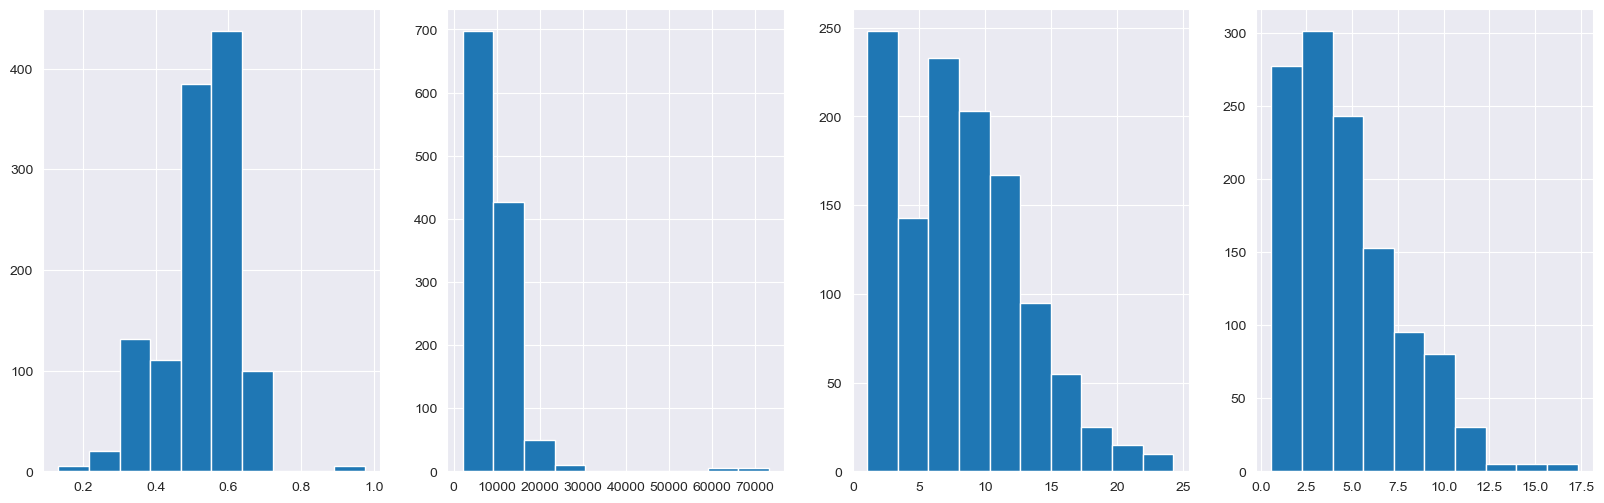

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))
ax1.hist(rp_data['ats_fraction'])
ax2.hist(rp_data['Daily Avg Rch\'000'])
ax3.hist(rp_data['Daily Avg Rch%'])
ax4.hist(rp_data['rat%/AP'])

analysing variable ['Channel Major', 'Programme Language']
dict_keys([('Big Magic', 'HINDI'), ('Colors', 'HINDI'), ('Colors', 'KANNADA'), ('DD Bharati', 'HINDI'), ('DD National', 'HINDI'), ('Dangal', 'HINDI'), ('Dangal/DD National', 'HINDI'), ('ETV Telugu', 'TELUGU'), ('STAR', 'BENGALI'), ('STAR', 'HINDI'), ('STAR', 'TAMIL'), ('STAR', 'TELUGU'), ('Shemaroo TV', 'HINDI'), ('Sony Pal', 'HINDI'), ('Sun TV', 'TAMIL'), ('Udaya TV', 'KANNADA'), ('Zee', 'BENGALI'), ('Zee', 'HINDI'), ('Zee', 'KANNADA'), ('Zee', 'TAMIL'), ('Zee', 'TELUGU')])


('Big Magic', 'HINDI')
Less than 30 samples, skipping group


('Colors', 'HINDI')
found 32 samples


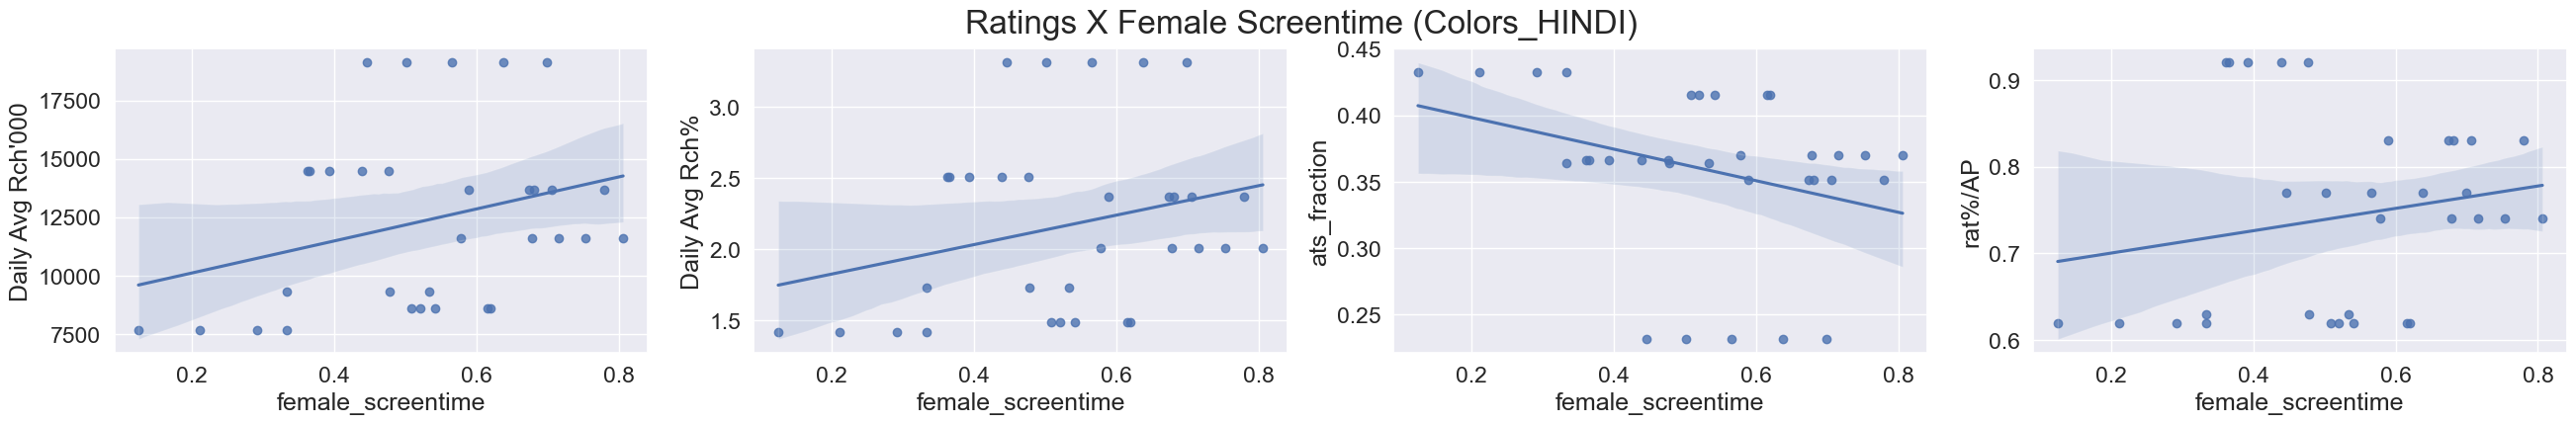

dar_1k r:0.30293771116010926, p-value: 0.09191936910491955
dar_perc r:0.27334264824544907, p-value: 0.13009287004931652
rat_perc r:0.19785572573970814, p-value: 0.2777063147756017
ats r:-0.32154334863493944, p-value: 0.0727247999048938


('Colors', 'KANNADA')
found 35 samples


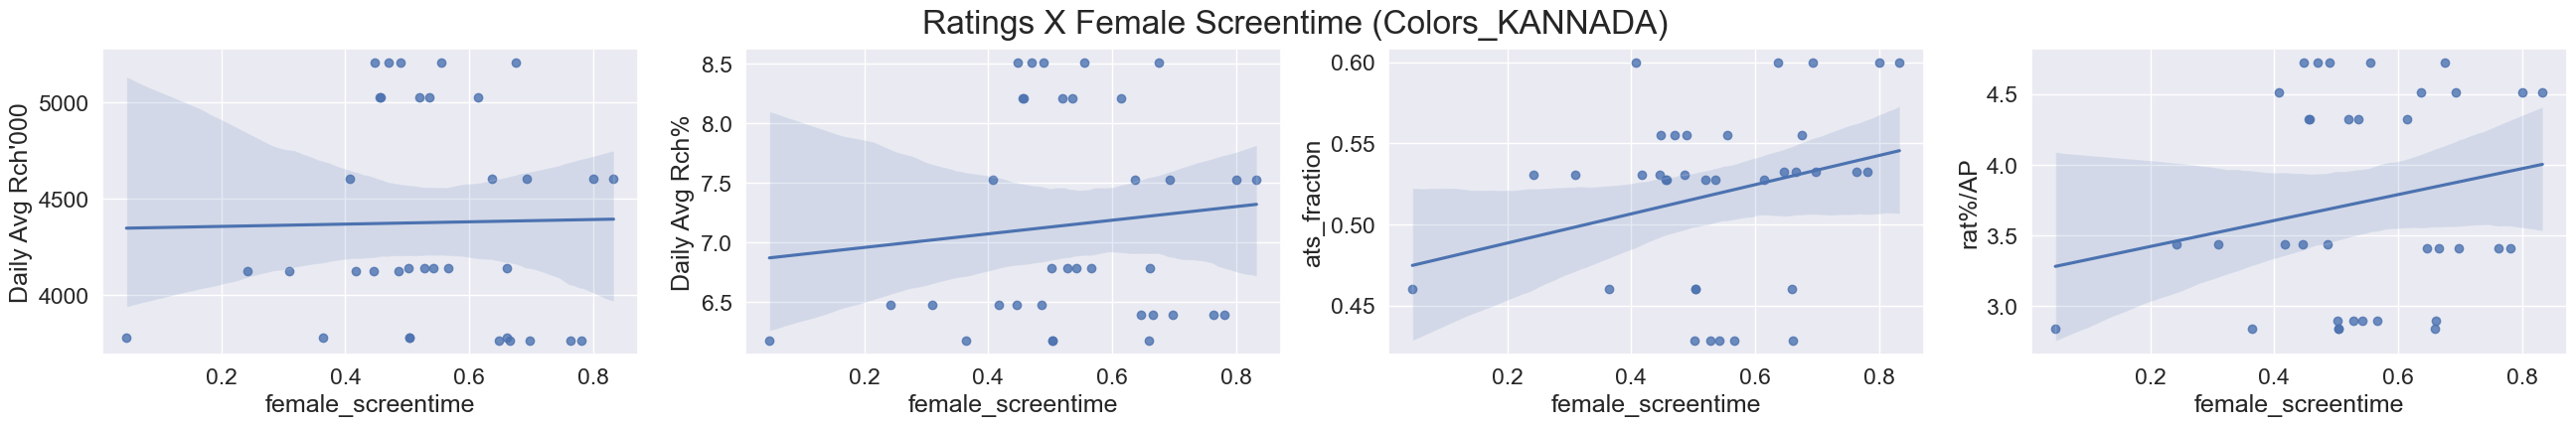

dar_1k r:0.017726208981458644, p-value: 0.9194957848275639
dar_perc r:0.10579866331023216, p-value: 0.5452564556535634
rat_perc r:0.20452815985860764, p-value: 0.2385694243567724
ats r:0.27012162075607726, p-value: 0.11656465046660171


('DD Bharati', 'HINDI')
Less than 30 samples, skipping group


('DD National', 'HINDI')
Less than 30 samples, skipping group


('Dangal', 'HINDI')
found 65 samples


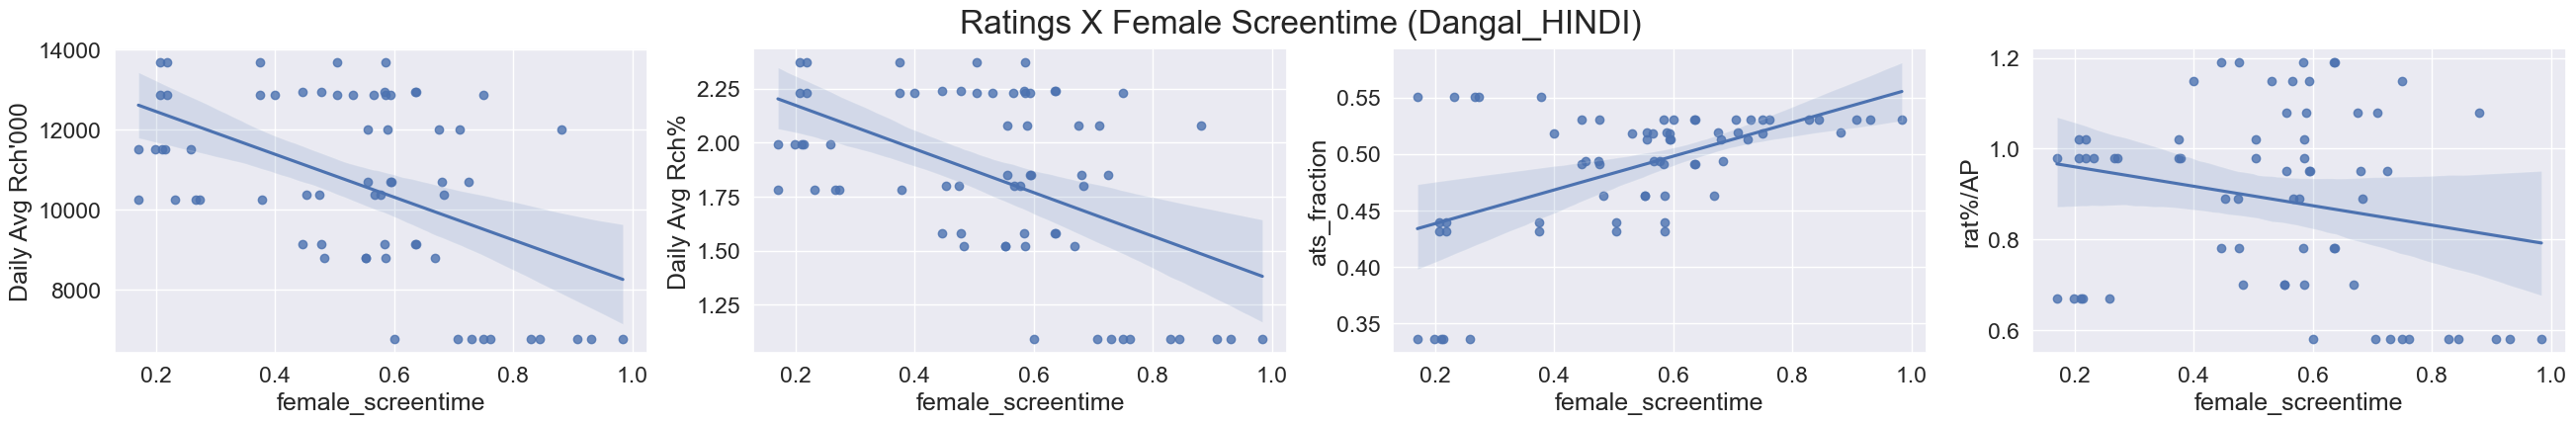

dar_1k r:-0.4930418431583968, p-value: 3.011197523581963e-05
dar_perc r:-0.506297024314582, p-value: 1.6860137378336647e-05
rat_perc r:-0.21753036176509463, p-value: 0.08174191407201892
ats r:0.5379966073132787, p-value: 3.802451542640519e-06


('Dangal/DD National', 'HINDI')
Less than 30 samples, skipping group


('ETV Telugu', 'TELUGU')
found 35 samples


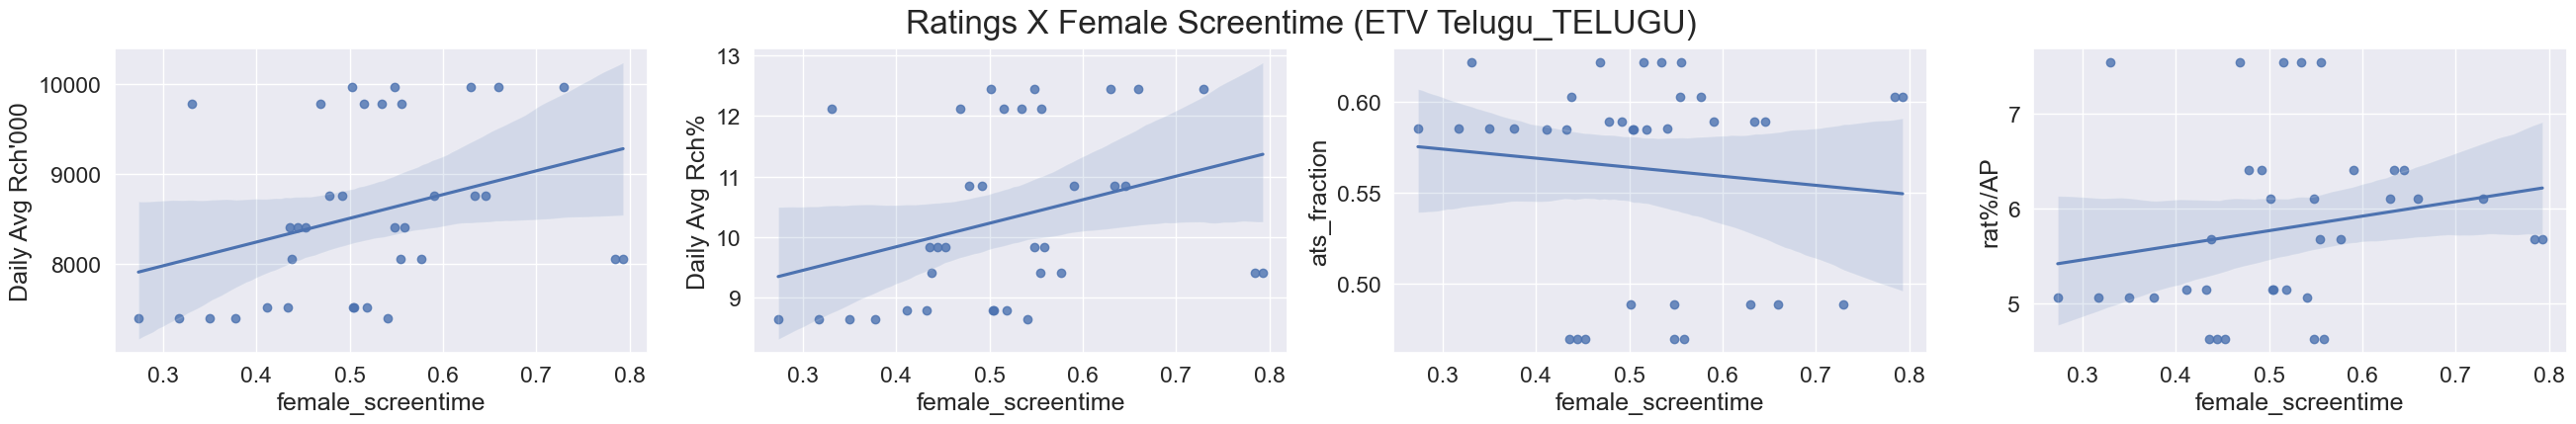

dar_1k r:0.3342573982647169, p-value: 0.04969999162020641
dar_perc r:0.3260121145965453, p-value: 0.05597204684052274
rat_perc r:0.2005704926946337, p-value: 0.247974302893796
ats r:-0.10862139578920396, p-value: 0.5345226552816094


('STAR', 'BENGALI')
found 119 samples


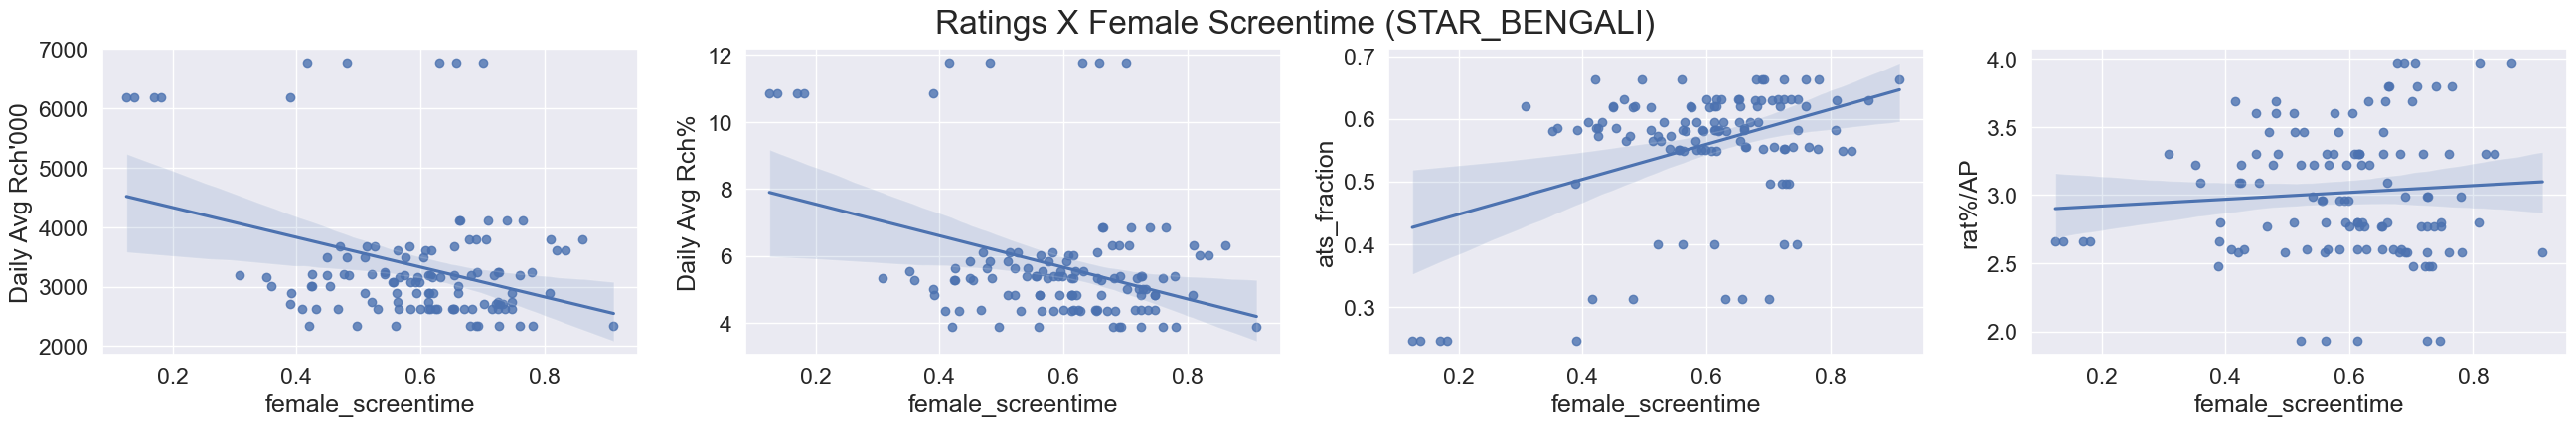

dar_1k r:-0.34499519763462555, p-value: 0.0001218427794315537
dar_perc r:-0.36665903835135466, p-value: 4.107680458491665e-05
rat_perc r:0.07620196790163856, p-value: 0.4101159407888383
ats r:0.4024291589439257, p-value: 5.706178231911539e-06


('STAR', 'HINDI')
found 96 samples


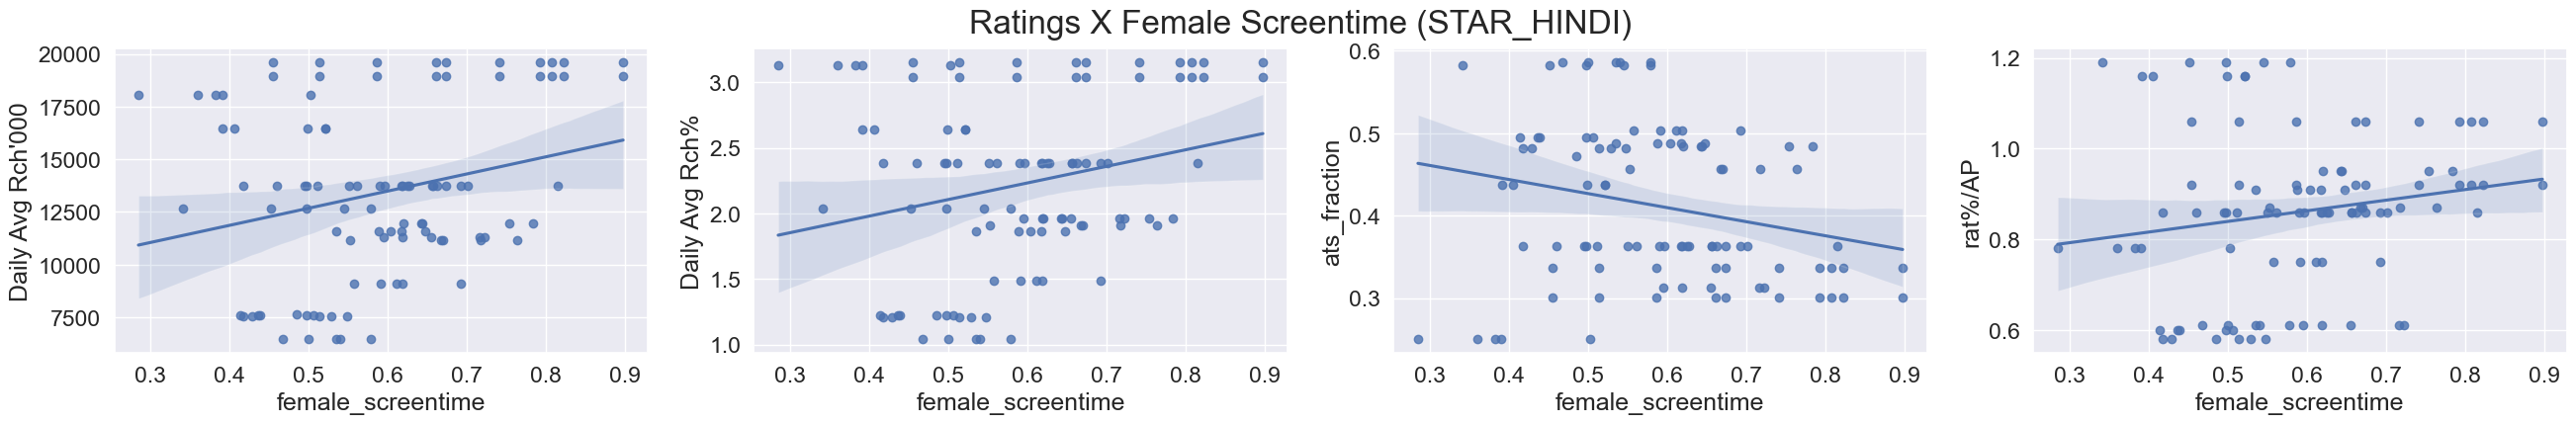

dar_1k r:0.2523840686430795, p-value: 0.013110418411330295
dar_perc r:0.24020521953680413, p-value: 0.018407608568093717
rat_perc r:0.16933465696837577, p-value: 0.09907916620937422
ats r:-0.2284012799288993, p-value: 0.025206394858784537


('STAR', 'TAMIL')
Less than 30 samples, skipping group


('STAR', 'TELUGU')
found 100 samples


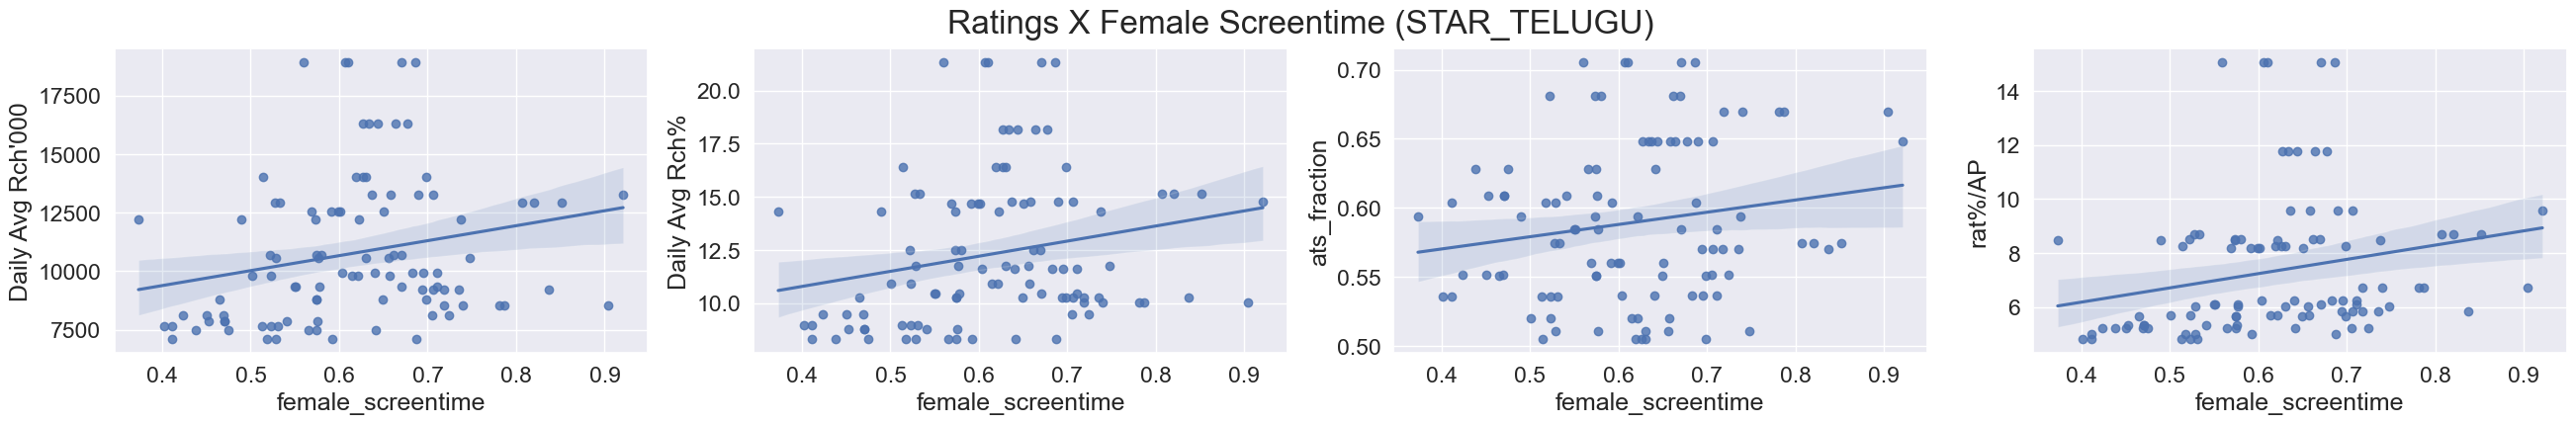

dar_1k r:0.22877554812257064, p-value: 0.02205349280409597
dar_perc r:0.22570786875407248, p-value: 0.023950494101763135
rat_perc r:0.22899605454784966, p-value: 0.02192223724372927
ats r:0.16998289229635144, p-value: 0.09087765353842683


('Shemaroo TV', 'HINDI')
Less than 30 samples, skipping group


('Sony Pal', 'HINDI')
Less than 30 samples, skipping group


('Sun TV', 'TAMIL')
found 210 samples


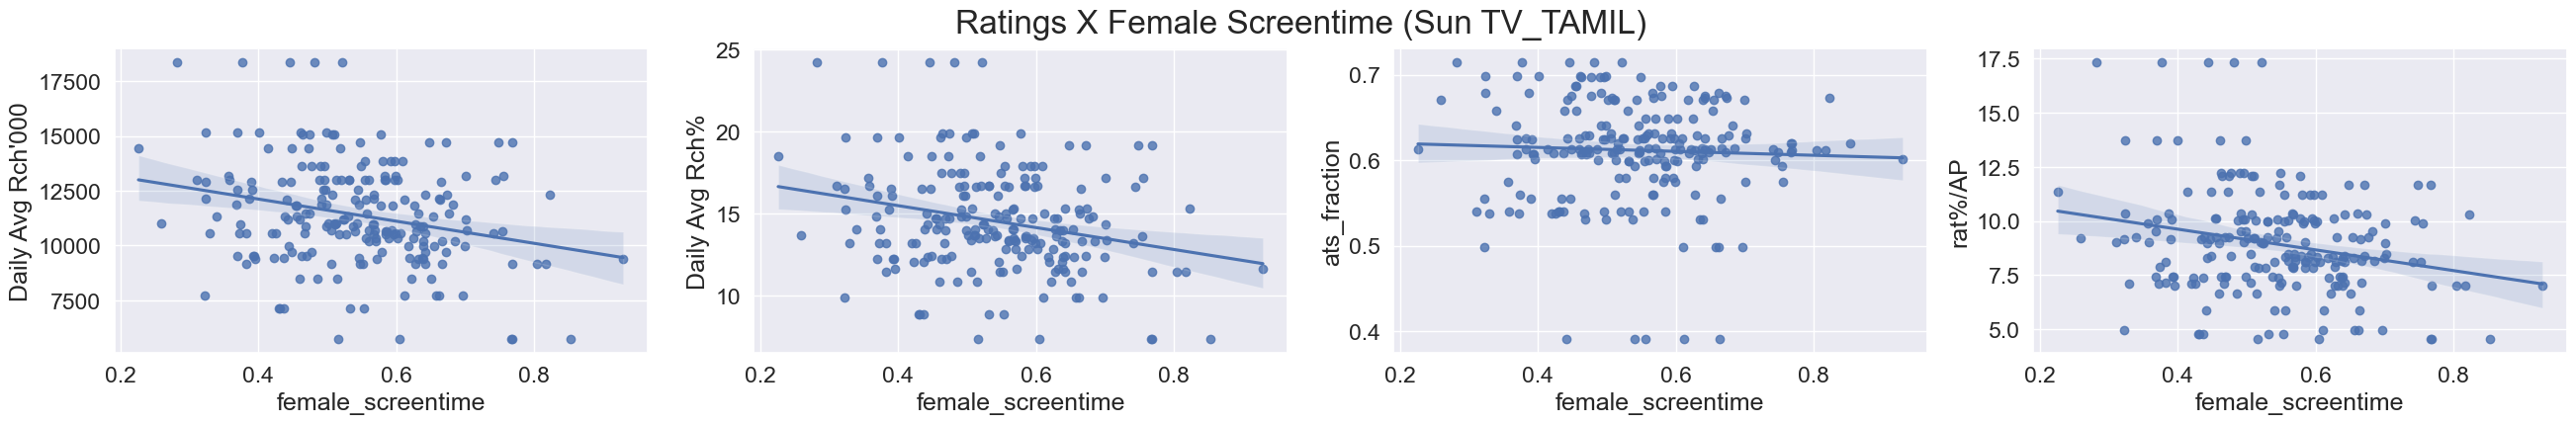

dar_1k r:-0.2549423467308206, p-value: 0.00018823086962320337
dar_perc r:-0.25110463870302346, p-value: 0.00023672567696829698
rat_perc r:-0.23785398675100508, p-value: 0.0005084163311711761
ats r:-0.04565604155531777, p-value: 0.5105297108985319


('Udaya TV', 'KANNADA')
Less than 30 samples, skipping group


('Zee', 'BENGALI')
found 106 samples


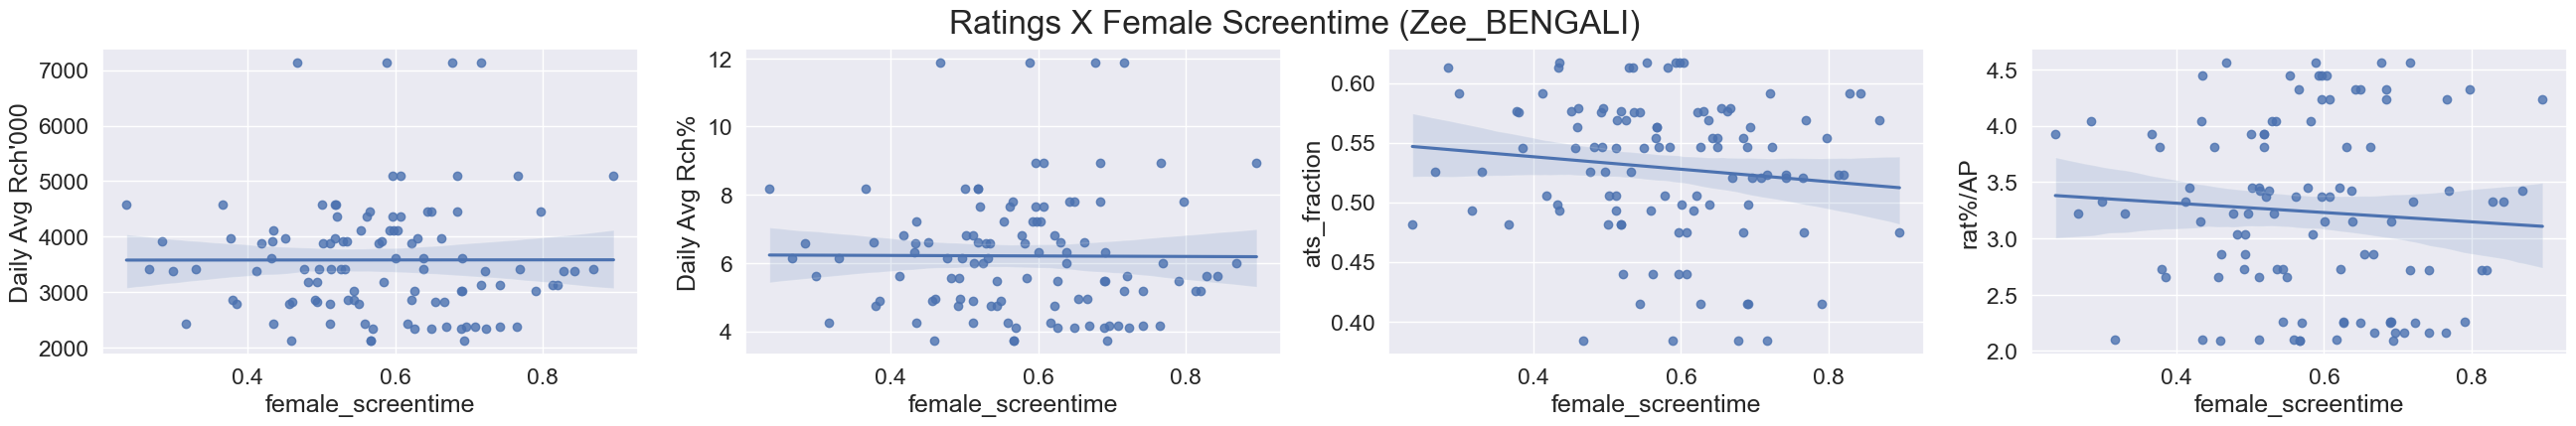

dar_1k r:0.000992648662945527, p-value: 0.991942486214082
dar_perc r:-0.005677821927199685, p-value: 0.9539365378314075
rat_perc r:-0.07186498638466035, p-value: 0.4641260019206
ats r:-0.12069734318768977, p-value: 0.21778764200783812


('Zee', 'HINDI')
found 35 samples


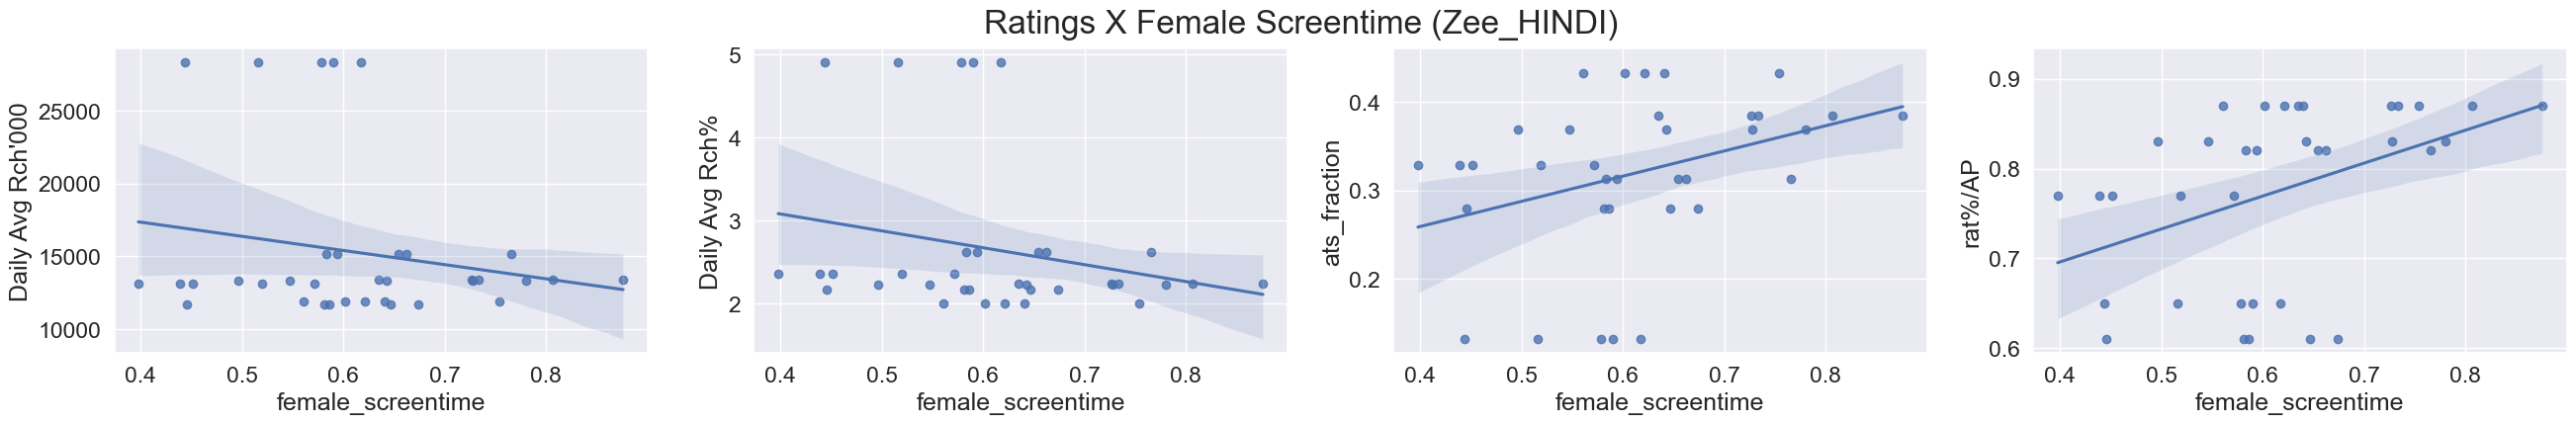

dar_1k r:-0.19973082035450684, p-value: 0.2500010461377639
dar_perc r:-0.24167264597609253, p-value: 0.16191426792146132
rat_perc r:0.42088891163159314, p-value: 0.011810304966849632
ats r:0.3533861045991529, p-value: 0.037300648431723794


('Zee', 'KANNADA')
found 187 samples


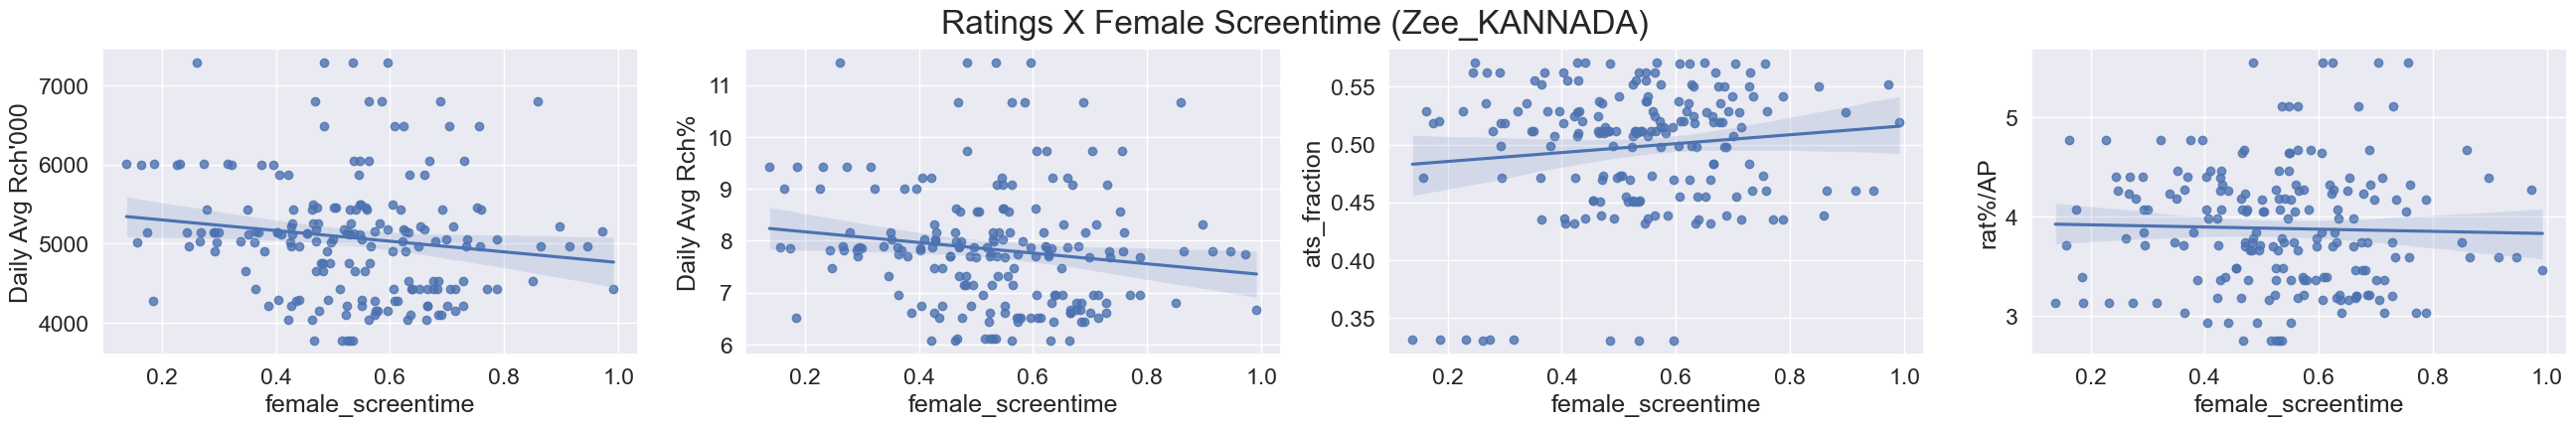

dar_1k r:-0.14574446908649666, p-value: 0.04655763967994241
dar_perc r:-0.14537645846602168, p-value: 0.04711971104705128
rat_perc r:-0.029163719691211232, p-value: 0.6919441359693606
ats r:0.11521848297474087, p-value: 0.11635496641752899


('Zee', 'TAMIL')
Less than 30 samples, skipping group


('Zee', 'TELUGU')
found 94 samples


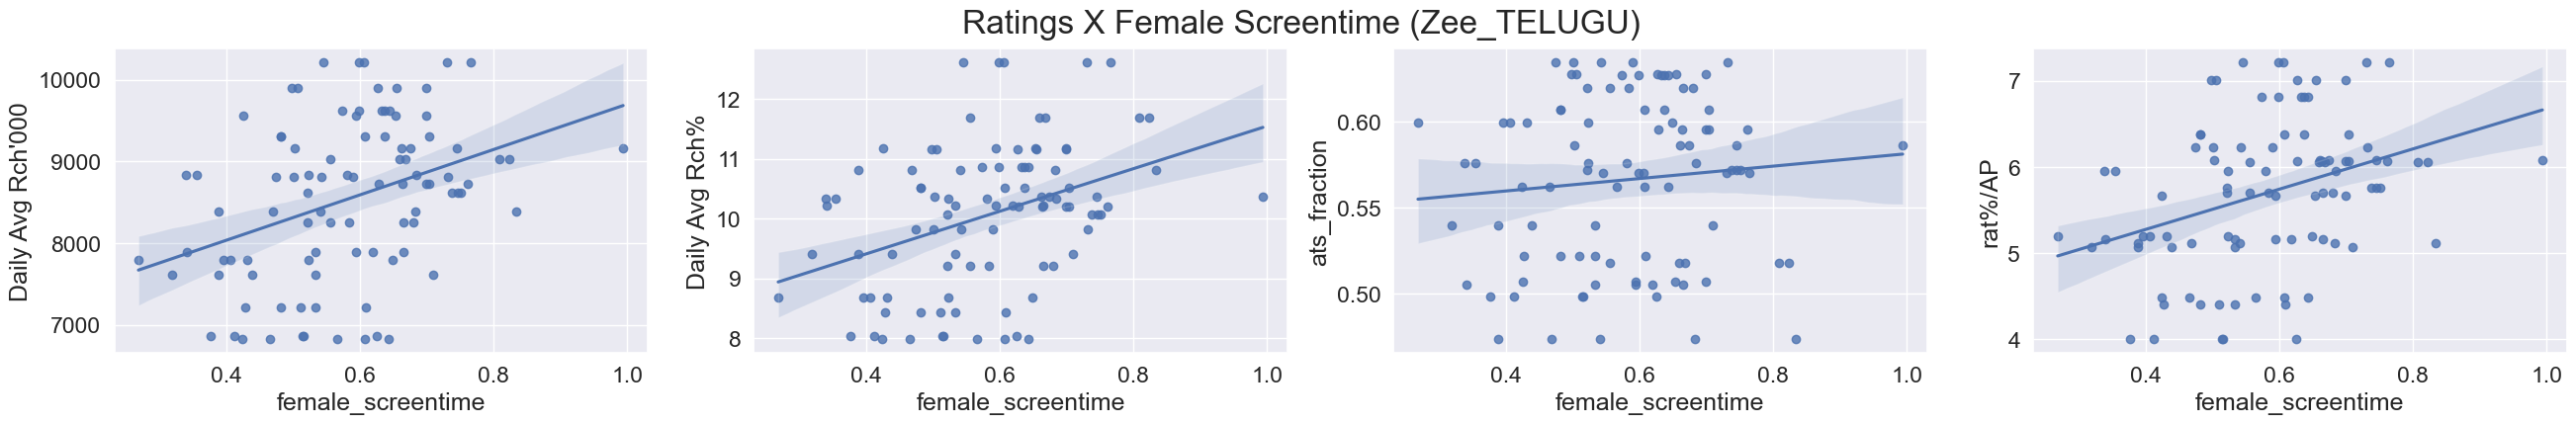

dar_1k r:0.3705570060288236, p-value: 0.0002365490609393172
dar_perc r:0.3802200917889293, p-value: 0.0001567983965360506
rat_perc r:0.35176791643644867, p-value: 0.0005076278552103259
ats r:0.09628104717275948, p-value: 0.3559360942789961


In [109]:
group_variable = ['Channel Major', 'Programme Language']
group_data = rp_data.groupby(group_variable)
print(f"analysing variable {group_variable}")
print(group_data.groups.keys())
sns.set(font_scale=1.5)

for group in group_data.groups.keys():
    print(f"\n\n{group}")
    grp_data = group_data.get_group(group)
    #grp_data = grp_data[grp_data['Daily Avg Rch\'000']<30000]
    num_samples = len(grp_data)
    if num_samples < 30:
        print('Less than 30 samples, skipping group')
        continue
    else:
        print(f"found {num_samples} samples")
    
    if isinstance(group, list) or isinstance(group, tuple):
        grpnamelabel = '_'.join([x.replace('/', '_') for x in group])
    else:
        grpnamelabel = group.replace('/', '_')
    
    female_sctime = grp_data['female_screentime']
    dar_1k = grp_data['Daily Avg Rch\'000']
    dar_perc = grp_data['Daily Avg Rch%']
    rat_perc = grp_data['rat%/AP']
    ats = grp_data['ats_fraction']
    
    x = np.linspace(0,1,100)

    ### DAR 1K
    fig, axs = plt.subplots(1,4, figsize = (32, 4))
    sns.regplot(data=grp_data, x='female_screentime', y='Daily Avg Rch\'000', ax=axs[0])
    sns.regplot(data=grp_data, x='female_screentime', y='Daily Avg Rch%', ax=axs[1])
    sns.regplot(data=grp_data, x='female_screentime', y='ats_fraction', ax=axs[2])
    sns.regplot(data=grp_data, x='female_screentime', y='rat%/AP', ax=axs[3])

#     m, b = np.polyfit(female_sctime, dar_1k, 1)
#     axs[0].scatter(female_sctime, dar_1k); axs[0].plot(x, m*x+b, color='red'); axs[0].set_xlabel('% Female Screentime', fontsize=16); axs[0].set_ylabel('Daily Avg Reach (in 1000s)', fontsize=16)
#     m, b = np.polyfit(female_sctime, dar_perc, 1)
#     axs[1].scatter(female_sctime, dar_perc); axs[1].set_xlabel('% Female Screentime', fontsize=16); axs[1].plot(x, m*x+b, color='red'); axs[1].set_ylabel('Daily Avg Reach (%)', fontsize=16)
#     m, b = np.polyfit(female_sctime, rat_perc, 1)
#     axs[2].scatter(female_sctime, rat_perc); axs[2].set_xlabel('% Female Screentime', fontsize=16); axs[2].plot(x, m*x+b, color='red'); axs[2].set_ylabel('Rating %', fontsize=16)
#     m, b = np.polyfit(female_sctime, ats, 1)
#     axs[3].scatter(female_sctime, ats); axs[3].set_xlabel('% Female Screentime', fontsize=16); axs[3].plot(x, m*x+b, color='red'); axs[3].set_ylabel('Average Time Spent Fraction', fontsize=16)
    fig.suptitle(f'Ratings X Female Screentime ({grpnamelabel})', fontsize=24)
    plt.show()

    fig.savefig(f'plots/ratings_x_female_screentime_{grpnamelabel}.png',bbox_inches='tight',dpi=300)
    
    r, p = pearsonr(female_sctime, dar_1k)
    print(f'dar_1k r:{r}, p-value: {p}')
    r, p = pearsonr(female_sctime, dar_perc)
    print(f'dar_perc r:{r}, p-value: {p}')
    r, p = pearsonr(female_sctime, rat_perc)
    print(f'rat_perc r:{r}, p-value: {p}')
    r, p = pearsonr(female_sctime, ats)
    print(f'ats r:{r}, p-value: {p}')

In [9]:
fsc_groups = [[0,0.2], [0.2,0.4], [0.4, 0.6], [0.6, 0.8], [0.8,1]]


Text(0, 0.5, 'Average Time Spent Fraction')

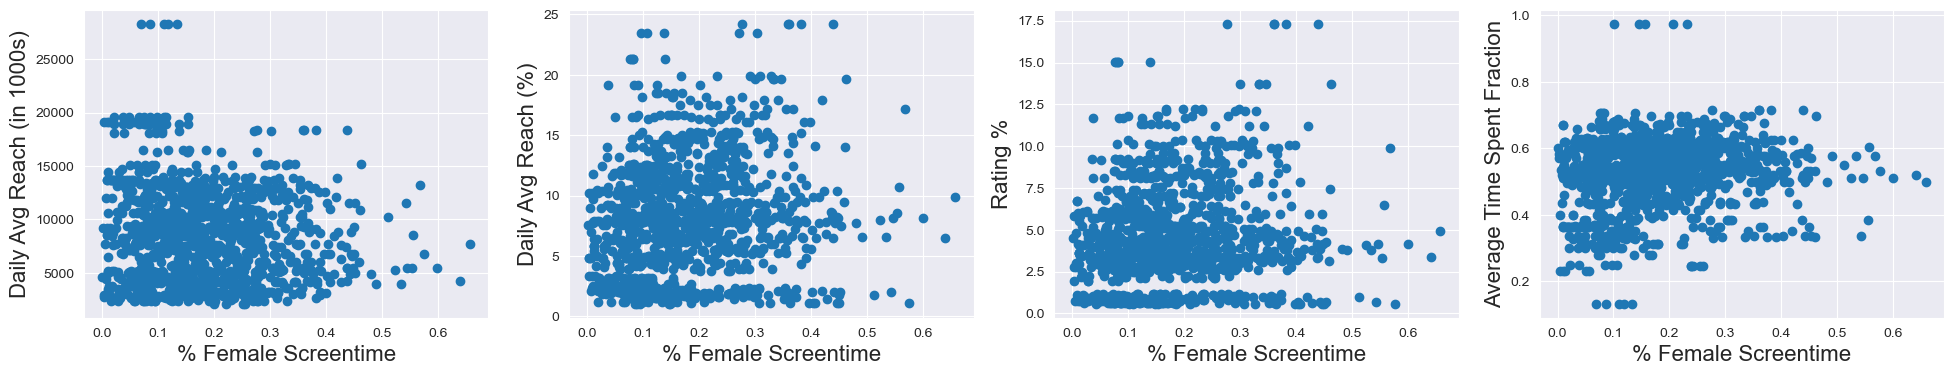

In [8]:
age_1 = rp_data['age_3_screen_time']

### DAR 1K
fig, axs = plt.subplots(1,4, figsize = (24, 4))
axs[0].scatter(age_1, dar_1k); axs[0].set_xlabel('% Female Screentime', fontsize=16); axs[0].set_ylabel('Daily Avg Reach (in 1000s)', fontsize=16)
axs[1].scatter(age_1, dar_perc); axs[1].set_xlabel('% Female Screentime', fontsize=16); axs[1].set_ylabel('Daily Avg Reach (%)', fontsize=16)
axs[2].scatter(age_1, rat_perc); axs[2].set_xlabel('% Female Screentime', fontsize=16); axs[2].set_ylabel('Rating %', fontsize=16)
axs[3].scatter(age_1, ats); axs[3].set_xlabel('% Female Screentime', fontsize=16); axs[3].set_ylabel('Average Time Spent Fraction', fontsize=16)

In [73]:
print(grp_data[['Program name','Daily Avg Rch%', 'female_screentime']])

                                          Program name  Daily Avg Rch%  \
376                                        RADHAKRISHN            3.13   
377                                        RADHAKRISHN            3.13   
378                                        RADHAKRISHN            3.13   
379                                        RADHAKRISHN            3.13   
380                                        RADHAKRISHN            3.13   
404                              KARMAPHAL DAATA SHANI            1.42   
405                              KARMAPHAL DAATA SHANI            1.42   
406                              KARMAPHAL DAATA SHANI            1.42   
407                              KARMAPHAL DAATA SHANI            1.42   
423                                MAHIMA SHANI DEV KI            2.23   
424                                Mahima Shani Dev Ki            2.37   
425                                MAHIMA SHANI DEV KI            2.23   
426                                Mah

In [104]:
rp_data = pd.read_csv('muse_rp.csv')
lng_data = rp_data.groupby(["Programme Language"])
print(lng_data.size())

Programme Language
BENGALI    230
HINDI      268
KANNADA    232
TAMIL      240
TELUGU     229
dtype: int64


In [96]:
from collections import Counter
#print(Counter(rp_data['Cat No.'].values).most_common(30))
print(Counter(rp_data.video_key.values).most_common(32))

[(nan, 180), ('HCMtK0yQGoA', 2), ('er_U-_pq6kU', 2), ('Ur1cPwAOb-Y', 2), ('E6lfzpXLLpQ', 2), ('Y2OGG8KLgC0', 2), ('qQ8u0IFE5VQ', 2), ('mVStBLAw9RQ', 2), ('QLJzjp1n5X4', 2), ('xu1UDKsxRWU', 2), ('uHuEfVDUZQ8', 2), ('iPrDgyFux5U', 2), ('fO0l7EDnJvg', 2), ('34xjVIYAUKc', 2), ('RGB9sbCNYFM', 2), ('9hw0XlsdJF0', 2), ('zRlEbVz_deQ', 2), ('FX9jQOjRB3k', 2), ('oYSZAuXmmJs', 2), ('ET7JLZxhhu0', 2), ('Bg-Lh8kidqc', 2), ('xwcYed2arRY', 2), ('ceR4TSDzbYk', 2), ('dKVpHGFfhjg', 2), ('IvBebRYGo98', 2), ('uF4-CTx7buY', 2), ('7D3AjkwnnMs', 2), ('NKmzC-cXU2E', 2), ('TaoOz4LBaDY', 2), ('fcbSe24WzrY', 2), ('xl22sJNDSCQ', 2), ('oavSTeIxgVw', 2)]
